## Day 2 Homework Solutions

In [15]:
import numpy as np
import quantecon as qe
import matplotlib.pyplot as plt
from scipy.linalg import eigvals
from numba import jit, vectorize
from scipy.stats import norm, beta
from scipy.optimize import minimize

### Exercise 1

In [16]:
!cat matrix_data.txt

5.643750010395732764e-01 1.692960892133389128e-01 6.683708744252630455e-04 1.389864248706673609e-08 1.170829457369152268e-15 0.000000000000000000e+00 0.000000000000000000e+00 0.000000000000000000e+00 0.000000000000000000e+00 0.000000000000000000e+00
4.632882898265253818e-02 5.641673663703478114e-01 1.558678202520563660e-01 5.041511365109471775e-04 8.437283142466194301e-09 6.139660181576728660e-16 0.000000000000000000e+00 0.000000000000000000e+00 0.000000000000000000e+00 0.000000000000000000e+00
5.057045828747336493e-05 5.827577815774982045e-02 6.016262054592469433e-01 1.424717506155509517e-01 3.770638996899374775e-04 5.076910586063219514e-09 3.219548919612956561e-16 0.000000000000000000e+00 0.000000000000000000e+00 0.000000000000000000e+00
3.968889156112886823e-10 7.762221762972721056e-05 7.279535037517061158e-02 6.380047468572456193e-01 1.292783343874331914e-01 2.796212783055623233e-04 3.028029115488102967e-09 1.125523230844239784e-16 0.000000000000000000e+00 0.000000000000000000e+00


In [17]:
X = np.loadtxt('matrix_data.txt')

In [18]:
n, _ = X.shape

Using tools in `scipy.linalg`

In [19]:
np.max(np.abs(eigvals(X)))

1.0044277694480632

Iteratively:

In [20]:
tol = 1e-9
iter_max = 40000
sr_estimate = 1.0
error = tol + 1
X_power = X
i = 1
o = np.ones((n, 1))
while error > tol and i < iter_max:
    new_estimate = (np.linalg.norm(X_power @ o))**(1/i)
    error = np.abs(sr_estimate - new_estimate)
    X_power = X_power @ X
    i += 1
    sr_estimate = new_estimate
    
print(sr_estimate)

1.0044624149953185


In [21]:
i

34650

### Exercise 2

In [22]:
@jit(nopython=True)
def quadmap_series(x0, n, x_vec):
    n = len(x_vec)
    x_vec[0] = x0
    for t in range(n-1):
        x_vec[t+1] = 4.0 * x_vec[t] * (1 - x_vec[t])
    

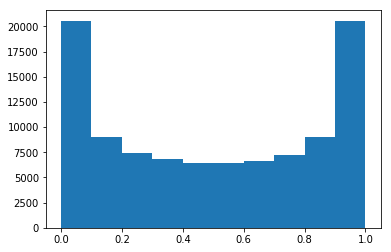

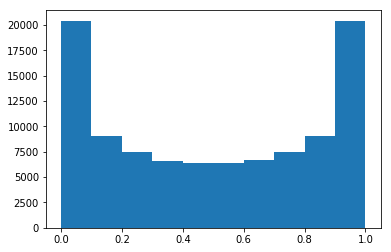

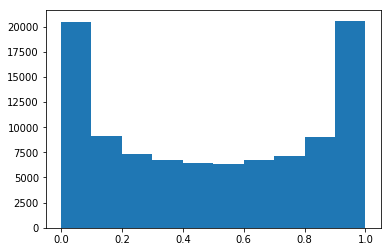

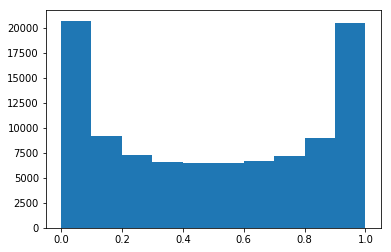

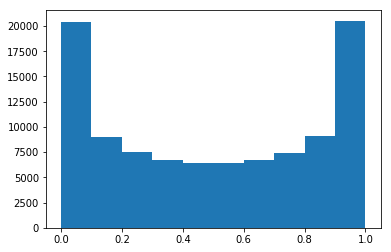

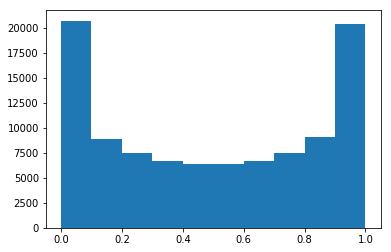

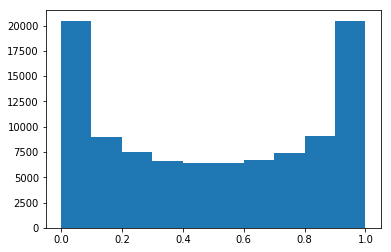

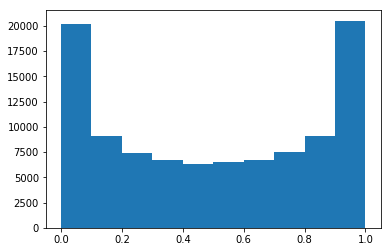

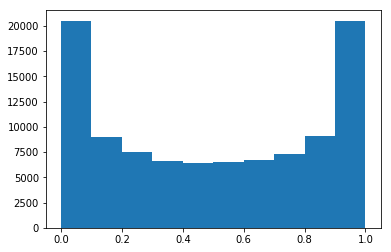

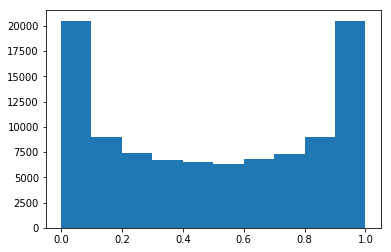

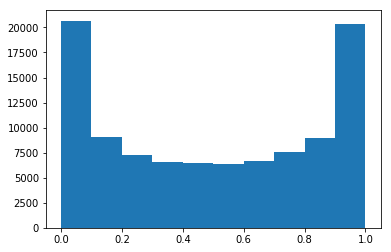

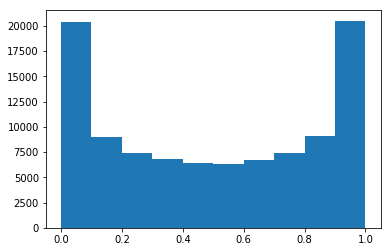

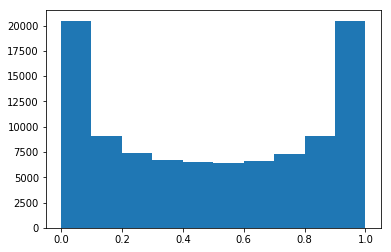

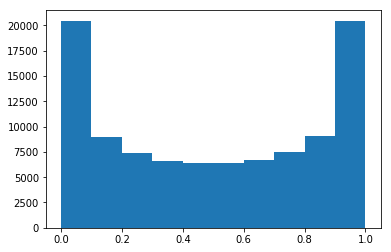

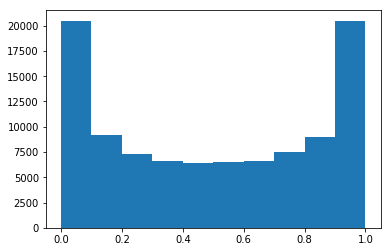

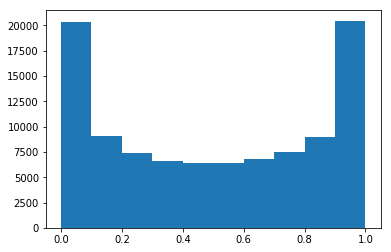

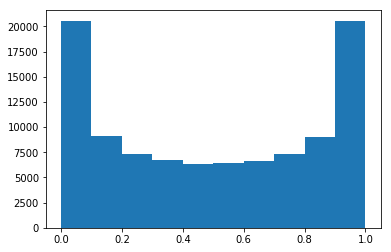

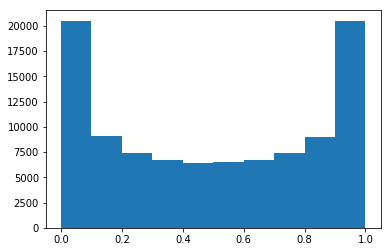

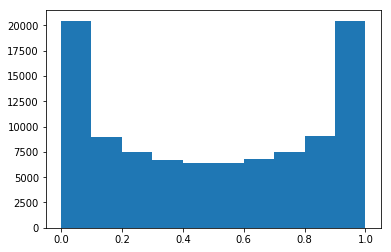

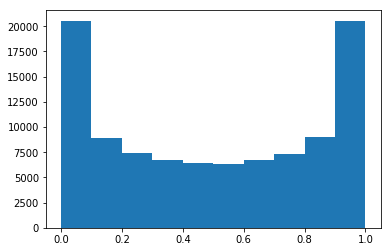

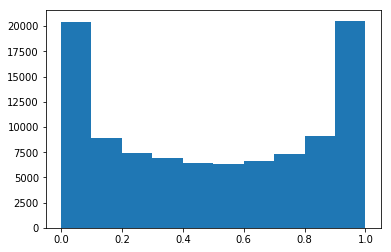

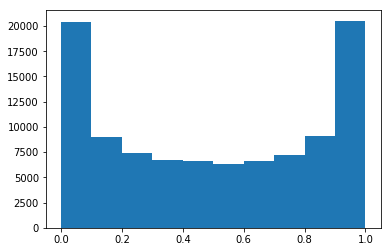

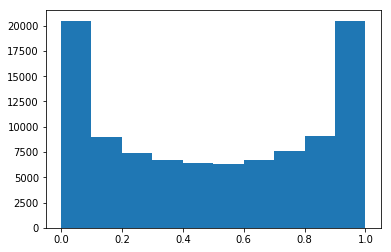

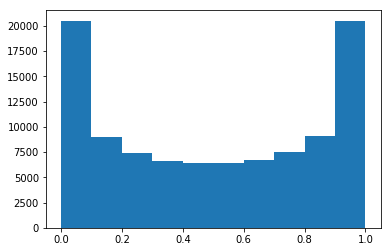

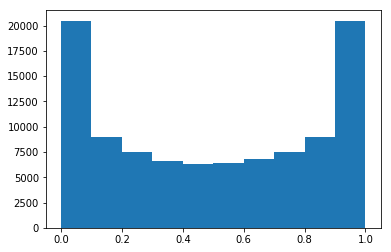

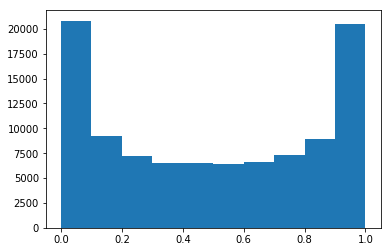

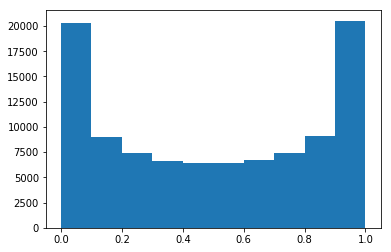

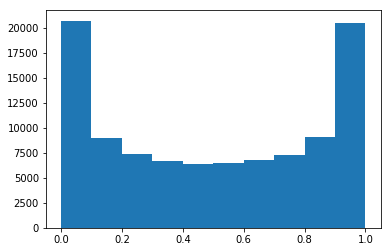

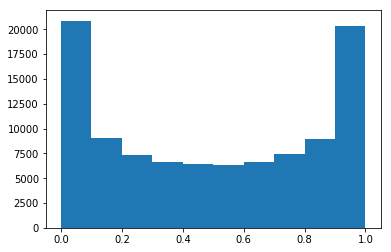

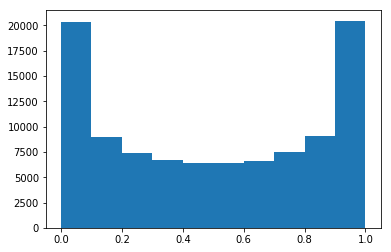

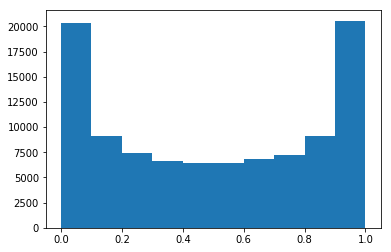

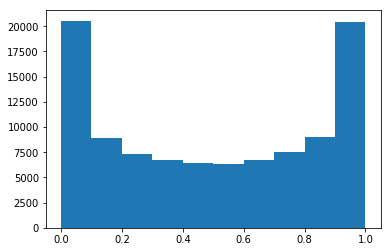

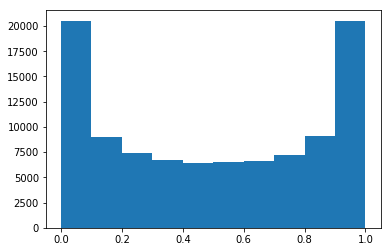

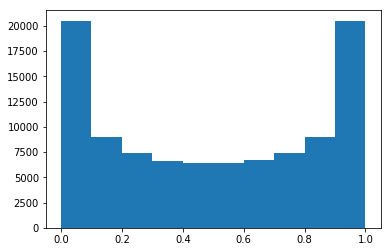

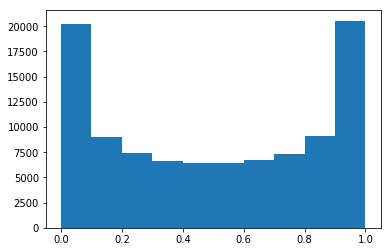

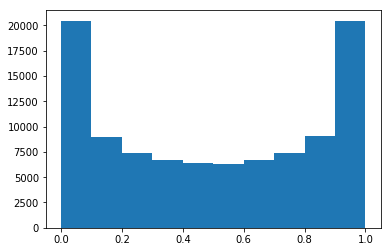

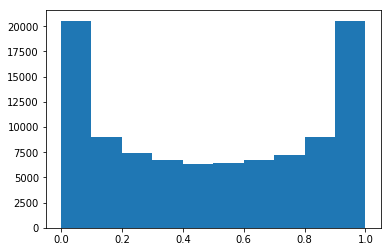

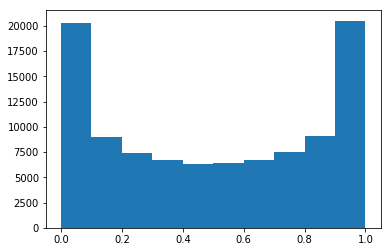

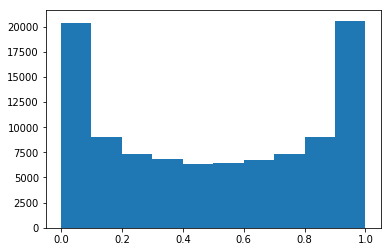

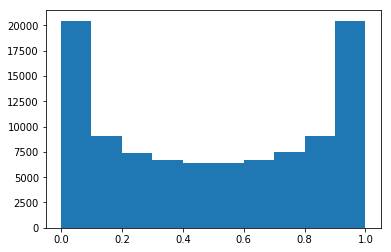

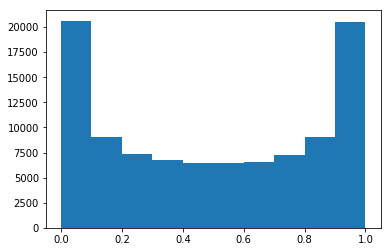

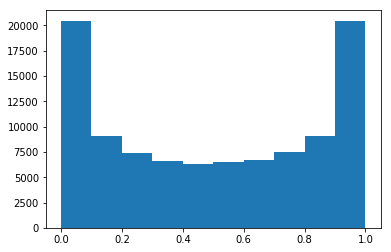

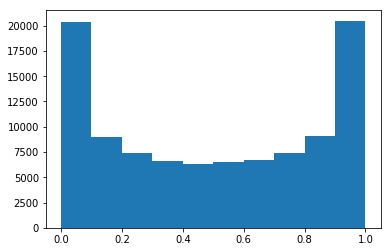

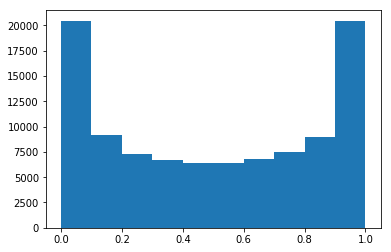

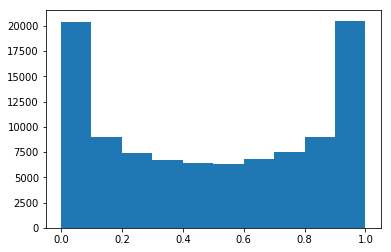

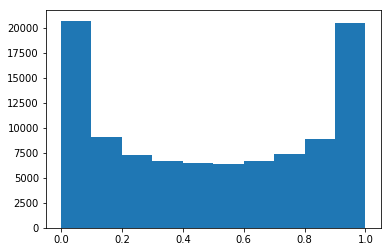

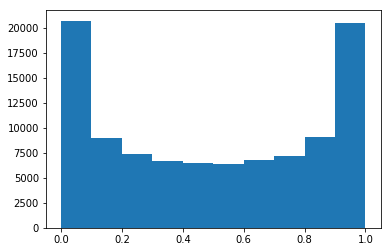

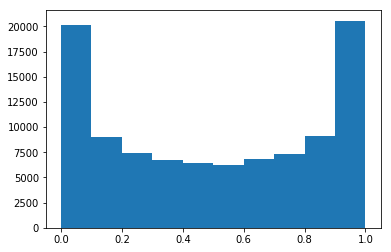

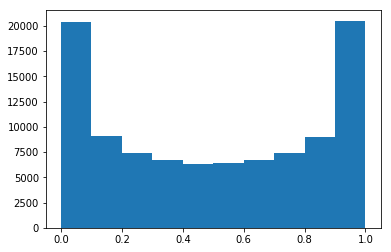

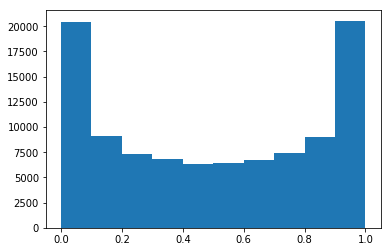

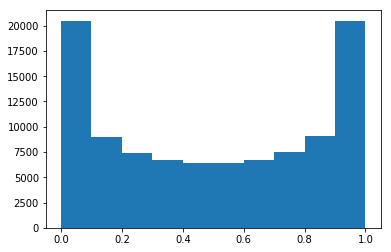

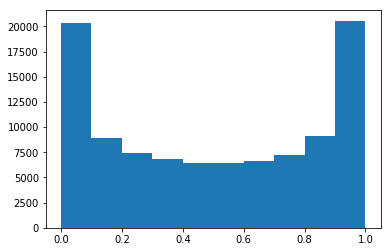

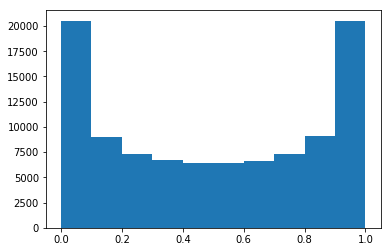

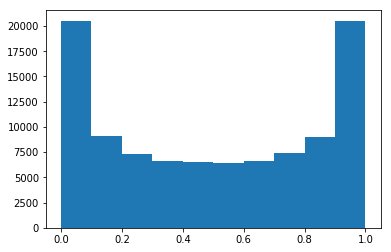

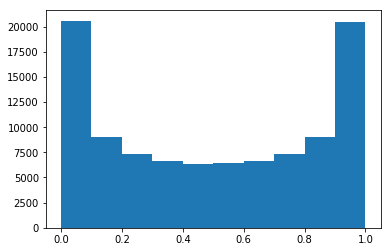

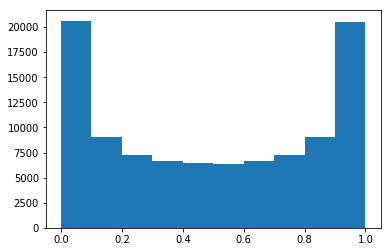

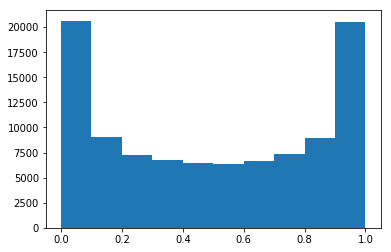

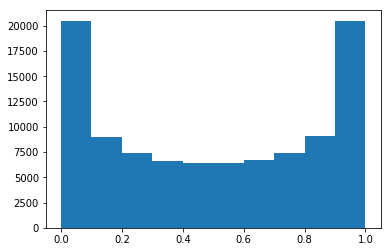

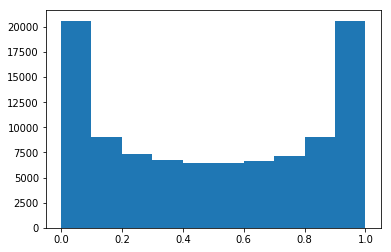

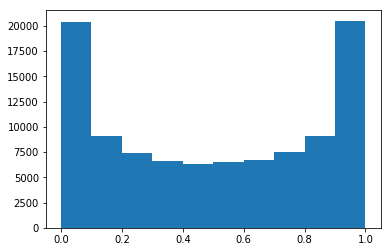

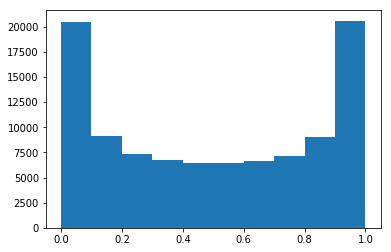

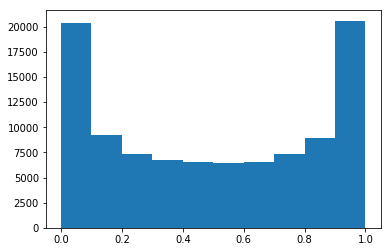

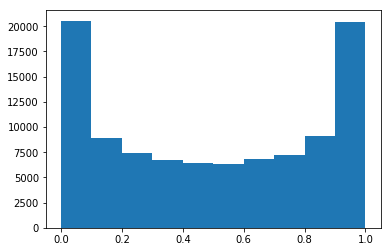

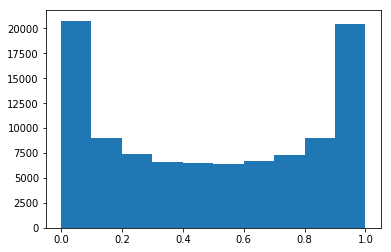

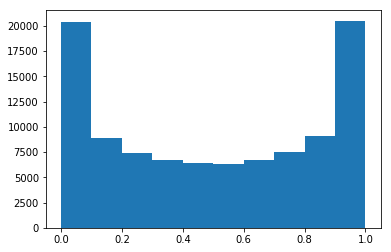

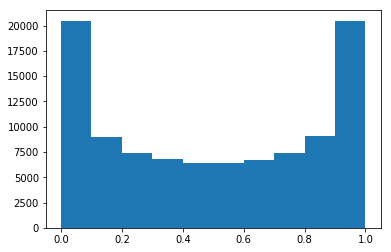

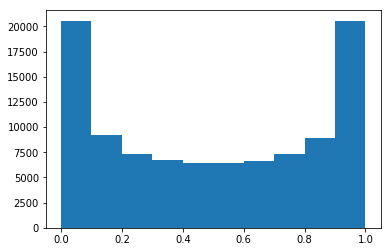

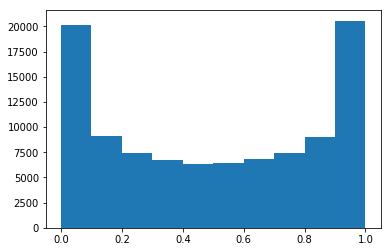

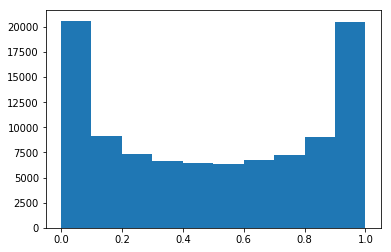

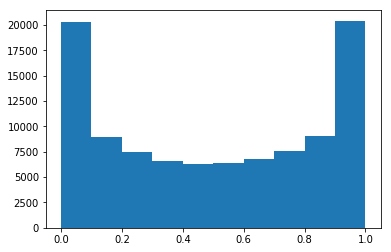

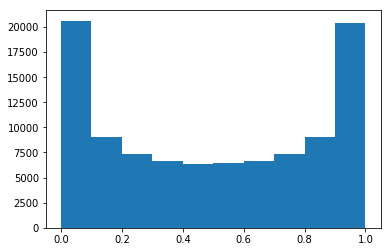

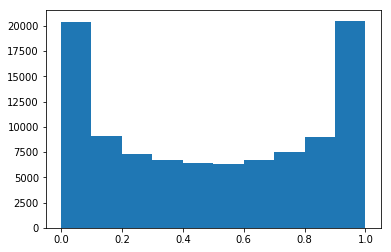

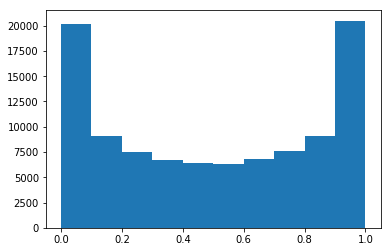

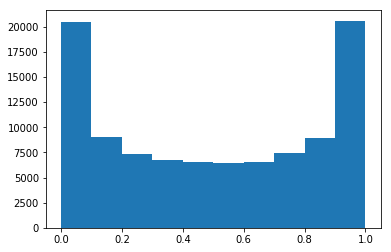

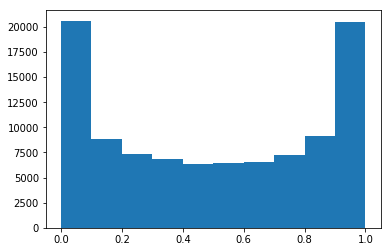

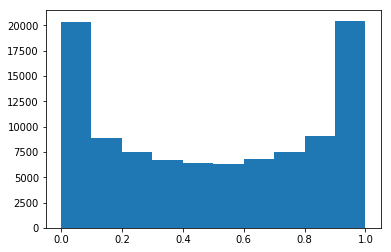

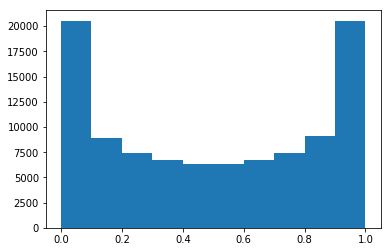

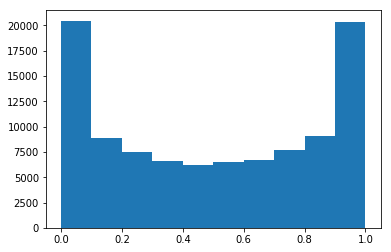

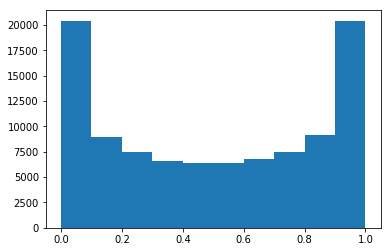

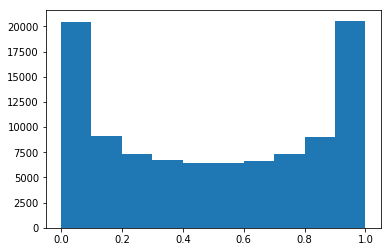

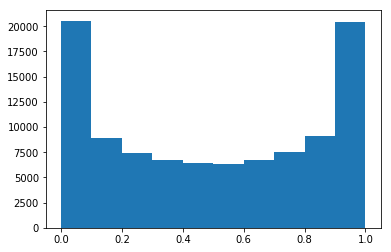

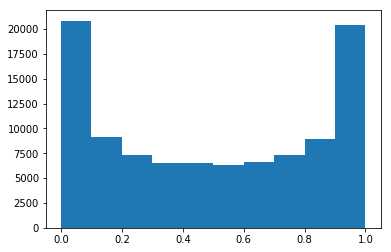

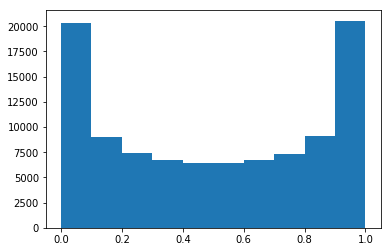

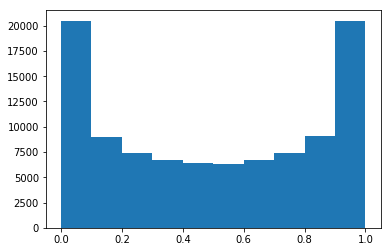

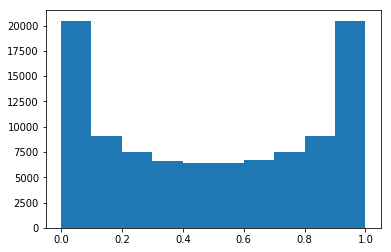

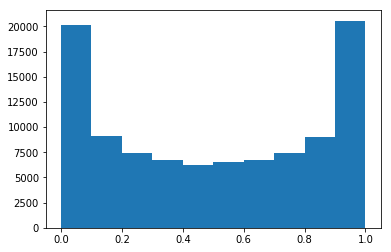

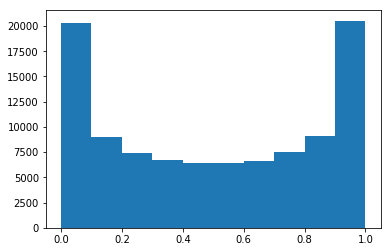

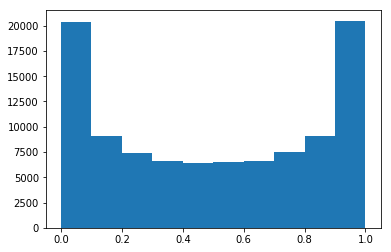

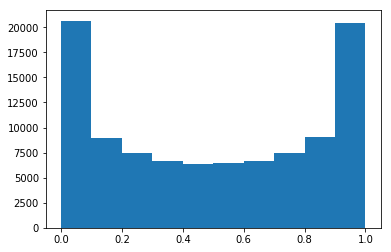

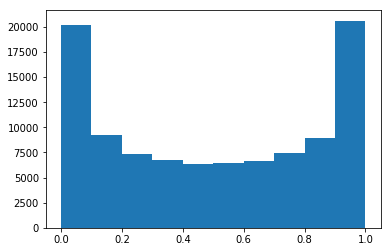

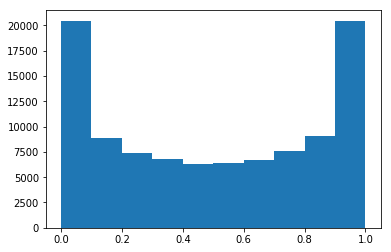

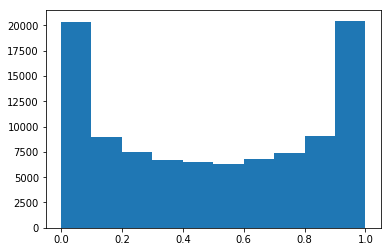

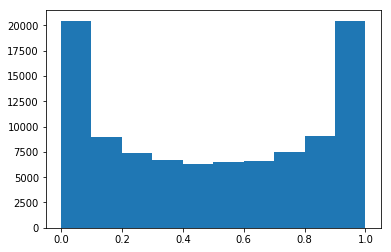

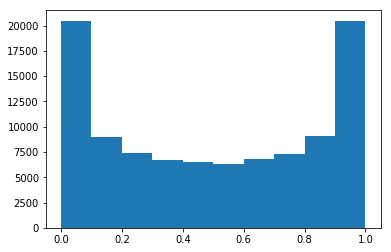

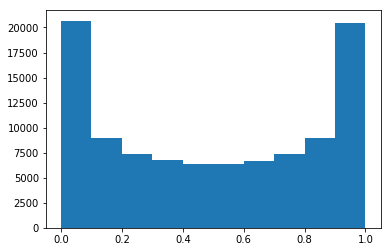

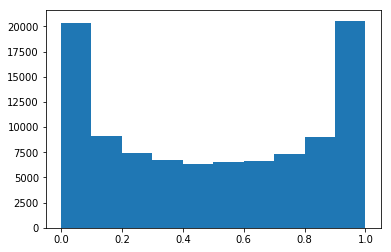

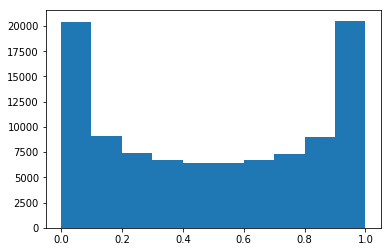

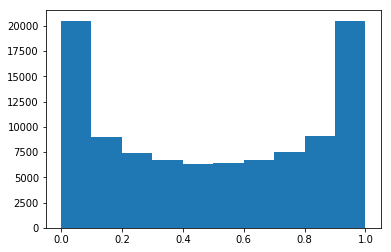

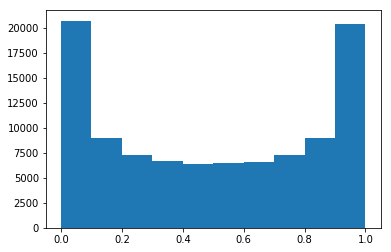

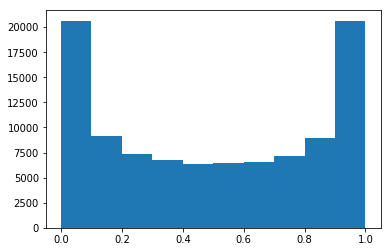

In [23]:
num_figs = 100
initial_conditions = np.random.uniform(size=num_figs)
ts_length = 100_000
x_vec = np.empty(ts_length)

for x0 in initial_conditions:
    quadmap_series(x0, ts_length, x_vec)
    fig, ax = plt.subplots()
    ax.hist(x_vec)
    plt.show()




### Exercise 3

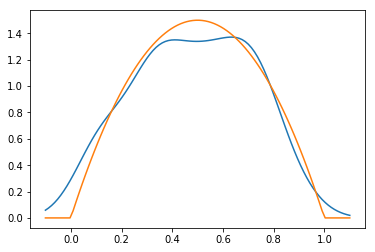

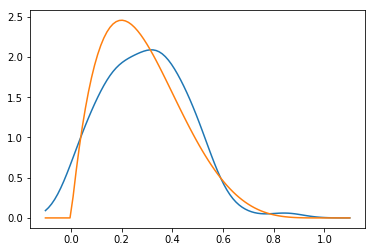

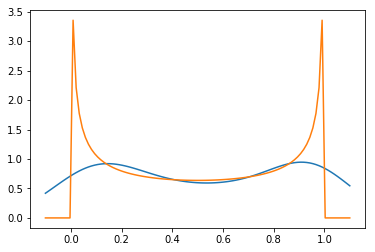

In [24]:
@vectorize
def K(x):
    return 1 / np.sqrt(2 * np.pi) * np.exp(-x**2/2)

class KDE:
    
    def __init__(self, x_data, h=None):

        if h is None:
            σ = x_data.std()
            n = len(x_data)
            h = 1.06 * σ * n**(-1/5)
        self.h = h
        self.x_data = x_data
        
    def kde_builder(self):
        
        x_data, h = self.x_data, self.h
        
        @vectorize
        def f(x):
            return K((x - x_data) / h).mean() * (1/h)
        return f


def plot_kde(ϕ, x_min=-0.2, x_max=1.2):
    x_data = ϕ.rvs(n)
    kde = KDE(x_data)
    f = kde.kde_builder()
    
    x_grid = np.linspace(-0.1, 1.1, 100)
    fig, ax = plt.subplots()
    ax.plot(x_grid, f(x_grid))
    ax.plot(x_grid, ϕ.pdf(x_grid))
    plt.show()


n = 100
parameter_pairs= (2, 2), (2, 5), (0.5, 0.5)
for α, β in parameter_pairs:
    plot_kde(beta(α, β))


### Exercise 4

In [25]:
y = np.array([3, 7, 10, 5])
X = np.array([[5, 3], 
              [2, 3], 
              [3, 1], 
              [2, 8]])

In [26]:
def logL(β, y, X):
    
    T = y.size
    ɛ = y - X @ β   # calculate unexplained error
    σ = np.sqrt(1) 

    # Return the negative of the log-likelihood
    return T/2 * np.log(2*np.pi*σ**2) + 1/(2*σ**2) * np.sum(ɛ**2)

minimize(logL, x0=[0.1, 0.1], args=(y, X))

      fun: 36.224799731970336
 hess_inv: array([[ 0.04400848, -0.02120891],
       [-0.02120891,  0.02226935]])
      jac: array([0., 0.])
  message: 'Optimization terminated successfully.'
     nfev: 24
      nit: 4
     njev: 6
   status: 0
  success: True
        x: array([1.33987275, 0.31813361])